## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#2

###  In this part of assignment you'll be determining the intrinsic and extrinsic parameters of a your mobile phone camera using camera calibration techniques. 
### Undergrad students have to strictly follow the handout and implement the procedure outlined in the handout. Grad students can follow the handout and get full marks but they are free to experiment and they can look at other ways of finding the projection matrix but keep in mind that you are not allowed to copy code or pictures, the picture you use for calibration should be your own and should be taken from you own mobile phone camera. You should be able to explain every step of your implementation.
### For this assignment we are using the direct linear transformation method

In [1]:
#Imports
import matplotlib
import cv2
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
%matplotlib notebook

## Part 1 (30 marks for undergrad)
### Take image of a calibration object with your camera phone. Unlike shown in the lecture slides here you are required to choose an appropriate 3D calibration object (i.e. a nonplanar object, a rubiks cube for example) so that the world points on that object span a 3-dimensional space, and the image points are easy to mark. Place the calibration object on a horizontal plane, such as a tabletop, or floor, to take the image. Mark at least 20 image points as carefully as possible and establish their world coordinates in millimeters. 
### From this data, compute the camera matrix P. Show the original points and the back-projected camera points on a single image and compute the average re-projection error.

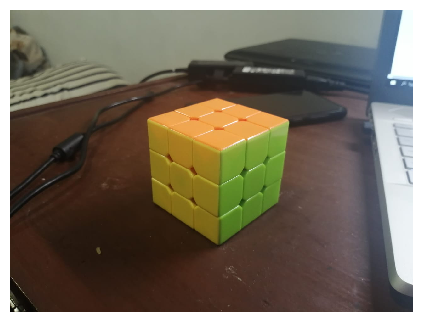

In [2]:
img = np.array(mpimg.imread('cube.jpeg'))
figure(dpi = 100)
plt.axis('off') # allows us to turn off axis, comment this out to show axis
plt.imshow(img)


In [3]:
imgPoints = np.array([[658.899,729.152,1],[736.821,682.398,1],[799.159,635.644,1],
                  [851.107,599.281,1],[666.692,648.631,1],[734.244,607.073,1],
                  [804.354,557.722,1],[861.497,526.554,1],[664.094,544.735,1],
                  [736.821,510.969,1],[814.744,469.411,1],[871.866,443.437,1],
                  [669.289,438.242,1],[747.211,399.281,1],[819.938,375.904,1],
                  [882.276,349.930,1],[591.367,399.281,1],[658.899,368.112,1],
                  [734.224,342.138,1],[796.562,316.164,1]])
# imgPoints = np.array([[658,736,799,851,666,734,804,861,664,736,814,871,669,747,819,882,591,658,734,796],[729,682,635,599,648,607,
#                         557,526,544,510,469,443,438,399,368,342,316],[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])
# realPoints = np.array([
#     [0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3,0,1,2,3],
#     [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,3,3,3,3],
#     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1],
#     [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
# ])
realPoints = np.array([[0,0,0,1],[1,0,0,1],[2,0,0,1],[3,0,0,1],
                      [0,1,0,1],[1,1,0,1],[2,1,0,1],[3,1,0,1],
                      [0,2,0,1],[1,2,0,1],[2,2,0,1],[3,2,0,1],
                      [0,3,0,1],[1,3,0,1],[2,3,0,1],[3,3,0,1],
                      [0,3,1,1],[1,3,1,1],[2,3,1,1],[3,3,1,1]])*18

In [4]:
realPoints.shape
realPoints[:,-1:] = realPoints[:,-1:]/18.0

In [5]:
p = np.zeros((40,12)) #20 points 2 equations for every points so 20*2=40 with 12 columns as per equation in slides
j = 0
for i in range(realPoints.shape[0]):
    x = imgPoints[i][0]
    y = imgPoints[i][1]
    X = realPoints[i][0]
    Y = realPoints[i][1]
    Z = realPoints[i][2]
    #print(x,y,X,Y,Z)
    p[j] = np.array([X,Y,Z,1,0,0,0,0,-x*X,-x*Y,-x*Z,-x])
    p[j+1] = np.array([0,0,0,0,X,Y,Z,1,-y*X,-y*Y,-y*Z,-y])
    j = j+2

In [6]:
#Now using SVD to to get U,S,V
U,S,V = np.linalg.svd(p,full_matrices=True)
#Now getting last column of V
lastCol = V[11:]
lastCol

array([[ 6.64886896e-03, -2.04497941e-03,  4.02510109e-05,
         6.72655453e-01, -2.12655705e-04, -6.79048577e-03,
         4.43244812e-04,  7.39891121e-01,  3.65918251e-06,
        -3.11138131e-06,  6.40791981e-06,  1.01359132e-03]])

In [7]:
lastCol = lastCol.reshape((3,4))
lastCol.shape

(3, 4)

In [8]:
projectedPoints = np.matmul(lastCol,realPoints.T)

In [9]:
projectedPoints

array([[6.72655453e-01, 7.92335094e-01, 9.12014735e-01, 1.03169438e+00,
        6.35845823e-01, 7.55525465e-01, 8.75205106e-01, 9.94884747e-01,
        5.99036194e-01, 7.18715835e-01, 8.38395477e-01, 9.58075118e-01,
        5.62226565e-01, 6.81906206e-01, 8.01585847e-01, 9.21265488e-01,
        5.62951083e-01, 6.82630724e-01, 8.02310365e-01, 9.21990007e-01],
       [7.39891121e-01, 7.36063318e-01, 7.32235516e-01, 7.28407713e-01,
        6.17662377e-01, 6.13834575e-01, 6.10006772e-01, 6.06178969e-01,
        4.95433633e-01, 4.91605831e-01, 4.87778028e-01, 4.83950225e-01,
        3.73204890e-01, 3.69377087e-01, 3.65549284e-01, 3.61721481e-01,
        3.81183296e-01, 3.77355493e-01, 3.73527691e-01, 3.69699888e-01],
       [1.01359132e-03, 1.07945661e-03, 1.14532189e-03, 1.21118718e-03,
        9.57586460e-04, 1.02345175e-03, 1.08931703e-03, 1.15518232e-03,
        9.01581596e-04, 9.67446882e-04, 1.03331217e-03, 1.09917745e-03,
        8.45576733e-04, 9.11442018e-04, 9.77307303e-04, 1.0431

In [10]:
projectedPoints[-1][0] = 1

In [11]:
for i in range(3):
    projectedPoints[i] = np.divide(projectedPoints[i],projectedPoints[2]) #Normailizing the points
projectedPoints

array([[6.72655453e-01, 7.34012917e+02, 7.96295557e+02, 8.51804241e+02,
        6.64008787e+02, 7.38213080e+02, 8.03443884e+02, 8.61236130e+02,
        6.64428152e+02, 7.42899532e+02, 8.11367081e+02, 8.71629159e+02,
        6.64903069e+02, 7.48161915e+02, 8.20198360e+02, 8.83138129e+02,
        5.85846376e+02, 6.64823704e+02, 7.34279475e+02, 7.95837681e+02],
       [7.39891121e-01, 6.81883192e+02, 6.39327266e+02, 6.01399788e+02,
        6.45019957e+02, 5.99768946e+02, 5.59990117e+02, 5.24747445e+02,
        5.49516134e+02, 5.08147620e+02, 4.72052922e+02, 4.40283982e+02,
        4.41361351e+02, 4.05266687e+02, 3.74037197e+02, 3.46751329e+02,
        3.96686070e+02, 3.67511845e+02, 3.41854884e+02, 3.19115283e+02],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.0000

In [12]:
#Caclulating sum of squared error 
square_difference = np.power(np.subtract(projectedPoints,imgPoints.T),2)
sum_square_difference = np.sum(square_difference,axis=0)
sqrt_sum_square_difference = np.sqrt(sum_square_difference)
error = np.sum(sqrt_sum_square_difference)/imgPoints.shape[0]
print("The squared projection error is:",error)

The squared projection error is: 52.97678197029311


In [13]:
imgPoints = imgPoints.astype('int').T
projectedPoints = projectedPoints.astype('int').T

In [14]:
imgPoints = imgPoints.T

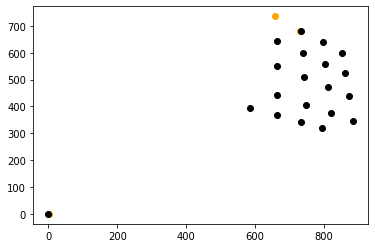

In [15]:
xData = imgPoints[0,:]
yData = imgPoints[1,:]
xData1 = projectedPoints[:,0]
yData1 = projectedPoints[:,1]
plt.plot(xData, yData, 'o', color = 'orange')
plt.plot(xData1, yData1, 'o', color = 'black')

## Part 2 (10 marks)
### Since we are using direct linear transformation, you are required to implement QR decomposition of a matrix

In [16]:
def qrDecomposition(P):
    R,K = np.linalg.qr(P)
    return R,K

## Part 3 (30 marks)
### Compute camera center C, intrinsic matrix K and Rotation matrix R. Generate a 3D figure which shows the calibration points, the camera center and the orientation of the camera in 3D (You also have to plot the points for 3d calibration object as well)

The camera centre is at points  [[-67.94894478 106.67671919 -67.57915133]]
The intrinsic camera matrix is: [[-1.06317247e+03  2.91970852e+02 -4.16566712e+00]
 [ 0.00000000e+00  1.09515559e+03 -7.10095827e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
The Rotation matrix is [[-9.99488761e-01 -3.19672243e-02 -5.59611175e-04]
 [ 3.19673900e-02 -9.99488870e-01 -2.89668137e-04]
 [-5.50065255e-04 -3.07409356e-04  9.99999801e-01]]
[ 0 18 36 54  0 18 36 54  0 18 36 54  0 18 36 54  0 18 36 54]
[ 0  0  0  0 18 18 18 18 36 36 36 36 54 54 54 54 54 54 54 54]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 18 18 18 18]


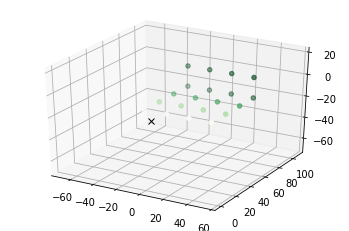

In [24]:
U,S,V = np.linalg.svd(lastCol, full_matrices=True)
temp1 = V[3:]
camera_centre= np.ones((1,3))
for i in range(3):
    camera_centre[0][i] = temp1[0][i]/temp1[0][3]
print("The camera centre is at points ", camera_centre)
R,K = qrDecomposition(lastCol[:,0:3])
K = K/K[2][2]
print("The intrinsic camera matrix is:",K)
print("The Rotation matrix is",R)
fig = plt.figure()
ax = plt.axes(projection='3d')
points = realPoints.T
xdata = points[0,:]
ydata = points[1,:]
zdata = points[2,:]
#Plotting code taken from stack overflow
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='Greens') #Viewing it on a specific plane
#ax.plot(K[0][0],K[1][2],K[2][2],marker='o',color='green')
print(xdata)
print(ydata)
print(zdata)
ax.plot(camera_centre[:,0], camera_centre[:,1], camera_centre[:,2],marker='x', color = 'black')


In [18]:
np.array([K[0,0]])

array([-1063.17247101])

In [19]:
camera_centre[:,0]

array([-67.94894478])

## Part 4 (20 marks)
### Search for the sensor information of your camera on the web. From this information, compute the focal length in mm. The following link may be useful to look up sensor sizes in mm(since most smartphone sensor sizes will be quoted in inches):
https://www.digicamdb.com/sensor-sizes/
### now re-plot everything along with the principal point of camera

mx equals  51.2
The focal length fx is equal to -20.76508732444374
The focal length fy is equal to 30.801250964825222
Principal points are: [ -4.16566712 -71.00958271   1.        ]


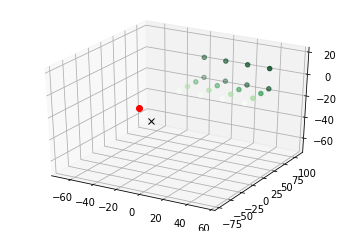

In [26]:
img_col = img.shape[0]
img_row = img.shape[1]
sensor_height = 27 #mm
sensor_width = 25 #mm
mx = img_row/sensor_width
my = img_col/sensor_height
mxf = K[0][0]
myf = K[1][1]
fx = mxf/mx
fy = myf/my
print("mx equals ", mx) #pixels/mm is the unit
print("The focal length fx is equal to" ,fx)
print("The focal length fy is equal to",fy)
print("Principal points are:",K[:,2])
principal_point = K[:,2]
#ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='Greens')
#ax.plot(camera_centre[:,0], camera_centre[:,1], camera_centre[:,2],marker='x', color = 'black')
#ax.scatter(K[2][0],K[2][1],K[2][2],marker='x', color = 'blue')
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(np.array([K[0,2]]),np.array([K[1,2]]),np.array([K[2,2]]),marker = 'o',color = 'red')
ax.scatter3D(xdata, ydata, zdata, c=ydata, cmap='Greens') #Viewing it on a specific plane
ax.plot(camera_centre[:,0], camera_centre[:,1], camera_centre[:,2],marker='x', color = 'black')



In [21]:
camera_centre[:,0]

array([-67.94894478])

In [22]:
principal_point[0]

-4.165667123497202

## Part 5 (10 marks)
### Suggest a few ways to minimize the error in this whole procedure. Since you are suggesting these, go back and try repeating/tweaking the whole algorithm and see if the things you suggest actually have an impact on the solution (it is perfectly fine if your propositions are not resulting in anything positive) (Suggest at least 2)

In [23]:
#1 We can make sure that the calibration pattern on the rubic cube has a strict pattern i.e the pattern used for estimation 
# is not fixed.Some cells have low distance and some have high. We can get a nicely made pattern with fixed distance between 
# them.Or we can change from cube to chess which has squares of strictly same size
#2 We can take several images of the cube by rotating along angles in x,y,z direction and can also take different distances from
# the object. We can then estimate these parameters several times and then take average of them.
#3 We can aslo apply edge detection to mark coordinates rather than manually marking them from the image array. This will reduce the sum
# of squared error.
#4 We can also improve the views of the image, such that all faces and edges are visible.
#5 We can also Set up a penalty cost for each bad observation and incorporate that when recalibrating.

## Part 6 (Grad Only, 20 marks for this part)(Upto 10 marks bonus for Undergrads)
### Look up the existing ways of camera calibration and draw a comparisons between the one you've implemented above. While comparing the two algorithms, you should be able the explain the computation/space complexity of the two algorithms, the assumptions that are kept in both algorithms and under what circumstances each would fail. You should also explain the equations involved in both algorithms.
### In case you have opted for not following the handout (i.e looking up and implementing your own algo) you can draw comparison between the algorithm that you've written and the one proposed in the handout (DLT)

# Limitations of dlt:
    1. The calibration frame must be large enough to well include the space of motion. If it is too small, 
    there is a danger of extrapolation and, as a result, inaccurate coordinate computation.
    2. Once the recording for camera calibration is done, you should not alter the camera setting including focus.
    3. Set the control object (calibration frame) properly to align the axes well in relation to direction of the motion. 
       If it is difficult to align the horizontal axes properly in 3-D analys}is, keep at least the Z axis vertical. 
       This will simplify the subsequent axis-alignment substantially.
    4. Hugely affected by radial distortion

# Other camera callibaration algorithm:
Copied from Wikipedia

            Zhang algorithm: Zhang model is a camera calibration method that uses traditional calibration techniques (known calibration points) and self-calibration techniques (correspondence between the calibration points when they are in different positions). To perform a full calibration by the Zhang method at least three different images of the calibration target/gauge are required, either by moving the gauge or the camera itself. If some of the intrinsic parameters are given as data (orthogonality of the image or optical center coordinates) the number of images required can be reduced to two.

     In a first step, an approximation of the estimated projection matrix H between the calibration target and the image plane is determined using DLT method. Subsequently, applying self-calibration techniques to obtained the image of the absolute conic matrix. The main contribution of Zhang method is how to extract a constrained instrinsic K and n numbers of R and T calibration parameters from pose of the calibration target.

### Zhang Algorithm

`1: Calibrate(X, U˙)
 Input: X = (X0, . . . , XN−1), an ordered sequence of 3D points on the planar target, with Xj = (Xj, Yj, 0)⊺; U˙ = (U˙0, . . ., U˙ M−1), a sequence of views,each view U˙i = (u˙i,0, . . . ,u˙i,N−1) is an ordered sequence of observed image points u˙i,j = ( ˙ui,j , v˙i,j )⊺. Returns the estimated intrinsic parameters A, k
of the camera and the extrinsic transformations W = (W0, . . . ,WN−1), with Wi = (Ri| ti), for each view.
2: Hinit ← GetHomographies(X, U˙) 
3: Ainit ← GetCameraIntrinsics(Hinit) 
4: Winit ← GetExtrinsics(A, Hinit) 
5: kinit ← EstLensDistortion(Ainit, Winit, X, U˙) 
6: hA, k, Wi ← RefineAll(Ainit, kinit, Winit, X, U˙)
7: return hA, k, Wi`

# Limitations of Zhang Algorithm:
          1. Require three images at least.
          2. Uses dlt to estimate image plane.

# Time complexity of DLT and Zhang algorithm:
     1.Let R be of size R_{m,n} then space complexity of both dlt and zhang is :O(mnk)+O(n)+O(nm)+O(nm)=O(mnk)+O(nm)
     2. Time complexity of both dlt and zhang is:O(m^2*n+m*n^2+n^3)